## Data Analytic Project


##  Step 1: Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load the CSV

In [4]:
# Load the dataset
df= pd.read_csv(r"C:\Users\DELL\New folder\covid19_data_sample.csv")

# Priview the  data
print(df.head())
df.info()

  Country  TotalConfirmed  TotalDeaths  TotalRecovered  ActiveCases
0     USA        35000000       600000        29000000      5400000
1   India        32000000       430000        31000000       600000
2  Brazil        20000000       570000        19000000       500000
3  Russia         6000000       150000         5800000       200000
4      UK         5500000       128000         5300000        90000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         10 non-null     object
 1   TotalConfirmed  10 non-null     int64 
 2   TotalDeaths     10 non-null     int64 
 3   TotalRecovered  10 non-null     int64 
 4   ActiveCases     10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


##  Step 3 – Basic Data Exploration

In [5]:
# Summary statistics    
print(df.describe())

# Top 5 Countries by Total Confirmed cases  
top_5=df.sort_values('TotalConfirmed',ascending=False).head(5)

       TotalConfirmed    TotalDeaths  TotalRecovered   ActiveCases
count    1.000000e+01      10.000000    1.000000e+01  1.000000e+01
mean     1.216000e+07  233800.000000    1.126000e+07  7.270000e+05
std      1.223431e+07  212877.533912    1.086106e+07  1.652574e+06
min      3.700000e+06   50000.000000    3.600000e+06  9.000000e+04
25%      4.600000e+06   96000.000000    4.475000e+06  9.250000e+04
50%      5.650000e+06  127500.000000    5.500000e+06  1.000000e+05
75%      1.650000e+07  360000.000000    1.570000e+07  4.250000e+05
max      3.500000e+07  600000.000000    3.100000e+07  5.400000e+06


###  3.1: Data Analysis

In [6]:

# Total confirmed cases worldwide
total_cases = df['TotalConfirmed'].sum()
print(f" The total Cofirmed cases of worldwide :{total_cases}")

# Country with the highest number of deaths
max_Deaths_country =df.loc[df['TotalDeaths'].idxmax(),'Country']
print(f" Country with  highest Deaths:{max_Deaths_country}")

# Active cases as a percentage of total cases for each country
df['ActivePercentage'] = (df['ActiveCases']  / df['TotalConfirmed']) * 100
print(df[['Country','ActivePercentage']])




 The total Cofirmed cases of worldwide :121600000
 Country with  highest Deaths:USA
   Country  ActivePercentage
0      USA         15.428571
1    India          1.875000
2   Brazil          2.500000
3   Russia          3.333333
4       UK          1.636364
5   France          1.551724
6  Germany          2.631579
7    Italy          2.325581
8    Spain          2.432432
9   Turkey          1.818182


## Step 4: Data Cleaning

In [7]:
# Check for missing values in each column
print(df.isnull().sum())
# If there are missing values, we can decide to fill or drop them
# Example: df['TotalRecovered'].fillna(0, inplace=True)

# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()
# Check data types of ensure  numerical columns are numberic
print(df.dtypes)

# Standardize column names for consistency
# df.columns = df.columns.str.strip().str.replace('','_').str.lower()
# This converts columns like 'Total Confirmed' → 'total_confirmed'

# Handle inconsistent or invalid data
# Example: Remove rows with negative numbers (if any)
# df = df[df['TotalConfirmed'] >=0]

print(" Data cleaning is completed. Preview of cleaned data: ")
print(df.head())



Country             0
TotalConfirmed      0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
ActivePercentage    0
dtype: int64
0
Country              object
TotalConfirmed        int64
TotalDeaths           int64
TotalRecovered        int64
ActiveCases           int64
ActivePercentage    float64
dtype: object
 Data cleaning is completed. Preview of cleaned data: 
  Country  TotalConfirmed  TotalDeaths  TotalRecovered  ActiveCases  \
0     USA        35000000       600000        29000000      5400000   
1   India        32000000       430000        31000000       600000   
2  Brazil        20000000       570000        19000000       500000   
3  Russia         6000000       150000         5800000       200000   
4      UK         5500000       128000         5300000        90000   

   ActivePercentage  
0         15.428571  
1          1.875000  
2          2.500000  
3          3.333333  
4          1.636364  


## Step 5: Data Visualization

In [8]:
import matplotlib.pyplot as plt

# Sort top 5 countries by total confirmed cases
top_5 = df.sort_values('TotalConfirmed',  ascending=False).head(5)
print(top_5)


  Country  TotalConfirmed  TotalDeaths  TotalRecovered  ActiveCases  \
0     USA        35000000       600000        29000000      5400000   
1   India        32000000       430000        31000000       600000   
2  Brazil        20000000       570000        19000000       500000   
3  Russia         6000000       150000         5800000       200000   
5  France         5800000       111000         5600000        90000   

   ActivePercentage  
0         15.428571  
1          1.875000  
2          2.500000  
3          3.333333  
5          1.551724  



### 5.0 – Bar Chart of Top 5 Countries by Total Confirmed Cases ✅

<function matplotlib.pyplot.show(close=None, block=None)>

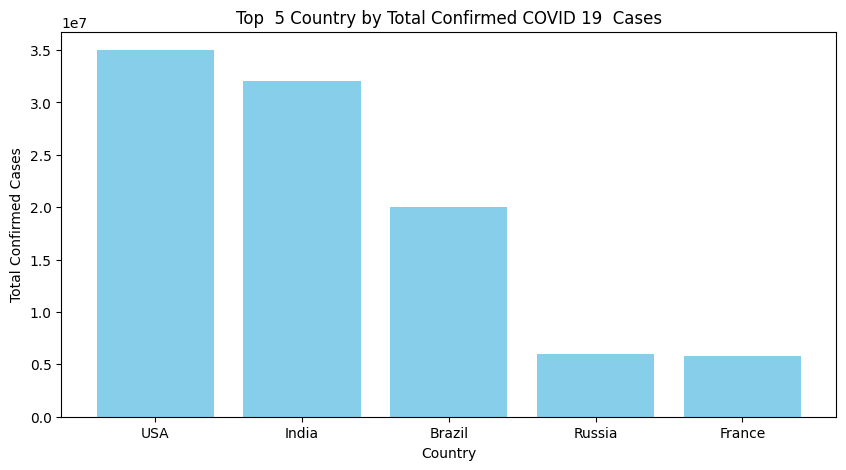

In [9]:
plt.figure(figsize=(10,5))
plt.bar(top_5['Country'], top_5['TotalConfirmed'], color='skyblue')
plt.title('Top  5 Country by Total Confirmed COVID 19  Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.show

###  5.1 Stacked Bar Chart: Deaths vs Recoveries (Top 5 countries)

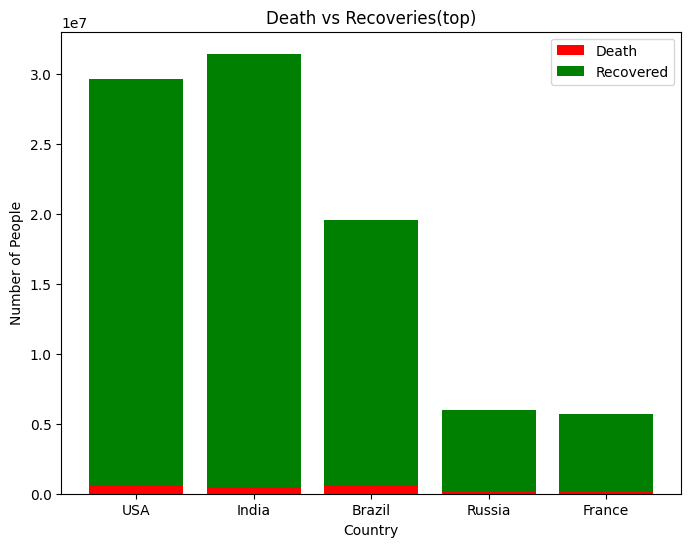

In [10]:
# Select top 5 countries by confirmed cases
top_5 = df.sort_values('TotalConfirmed', ascending=False).head(5)

# Plot stacked bar chart
plt.figure(figsize=(8,6))
plt.bar(top_5['Country'],top_5['TotalDeaths'], label='Death',color='red')
plt.bar(top_5['Country'],top_5['TotalRecovered'],bottom=top_5['TotalDeaths'], label='Recovered',color='green')


plt.title('Death vs Recoveries(top)')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.legend()
plt.show()

### 5.2 Pie Chart: Active Cases Distribution (Top 5 countries)

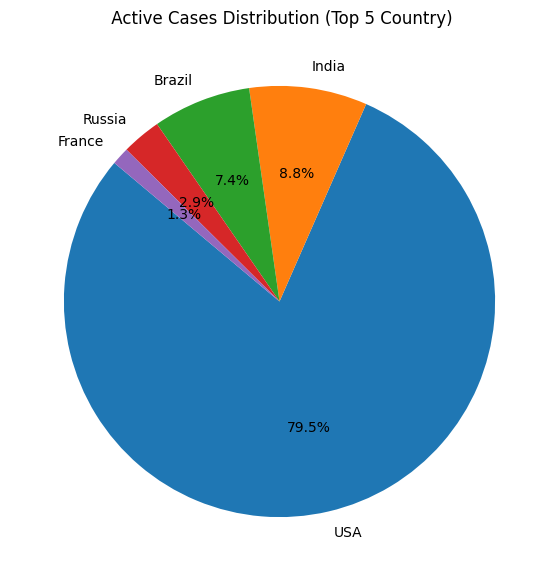

In [11]:
# Pie chart for Active cases (top 5 countries)
plt.figure(figsize=(7,7))
plt.pie(top_5['ActiveCases'], labels=top_5['Country'], autopct= '%1.1f%%' , startangle=140)
plt.title(' Active Cases Distribution (Top 5 Country)')
plt.show()

### 5.3 Bar Chart: Active Cases Percentage Each Countries

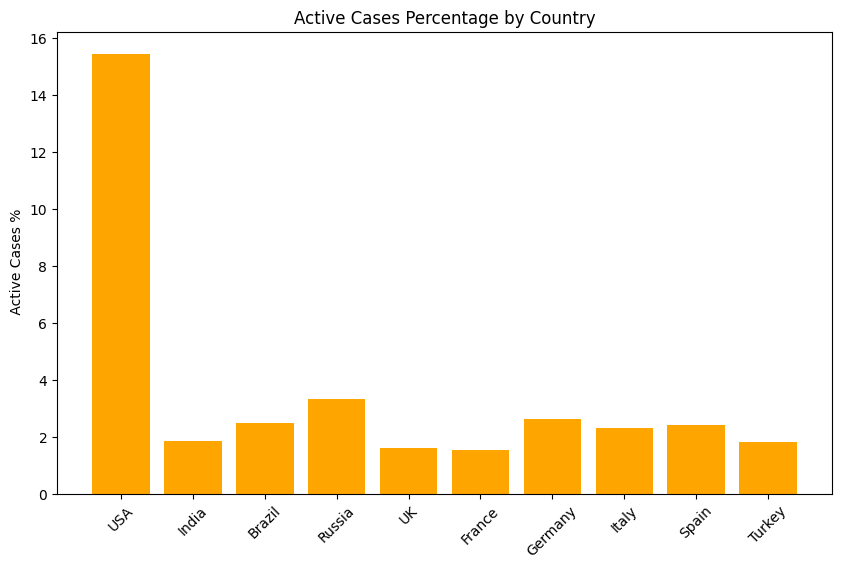

In [12]:
# Pie chart for Active cases (top 5 countries)
df['ActivePercentage'] = (df['ActiveCases']/ df['TotalConfirmed'])*100

plt.figure(figsize=(10,6))
plt.bar(df['Country'], df['ActivePercentage'], color='orange')
plt.xticks(rotation=45)
plt.title('Active Cases Percentage by Country')
plt.ylabel(' Active Cases %')
plt.show()

In [13]:
Summary=top_5[['Country','TotalConfirmed','TotalDeaths', 'TotalRecovered', 'ActiveCases']]
Summary['ActivePercentage'] = (Summary['ActiveCases']  / Summary['TotalConfirmed'])* 100

print(Summary)



  Country  TotalConfirmed  TotalDeaths  TotalRecovered  ActiveCases  \
0     USA        35000000       600000        29000000      5400000   
1   India        32000000       430000        31000000       600000   
2  Brazil        20000000       570000        19000000       500000   
3  Russia         6000000       150000         5800000       200000   
5  France         5800000       111000         5600000        90000   

   ActivePercentage  
0         15.428571  
1          1.875000  
2          2.500000  
3          3.333333  
5          1.551724  


###  Interactive Table (Plotly)

In [18]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Table(
    header = dict(values =list(Summary.columns),
                  fill_color = 'lightblue',
                  align = 'center'),
        cells =dict(values=[Summary[c] for c in Summary.columns],
                    fill_color='lightgrey',
                    align = 'center'))
])

# fig.update_layout(title = "COVID-19 Summary (Top 5 Countries)")
fig.write_html("summary_table.html")
print("✅ Table saved as summary_table.html. Open it in your browser.")



# fig.show()

✅ Table saved as summary_table.html. Open it in your browser.


###  Open the HTML automatically

In [19]:
import webbrowser

webbrowser.open("summary_table.html")

True